<a href="https://colab.research.google.com/github/clionelove123/Machine_Learning/blob/main/ML_Chap_10_Genetic_Algorithm_ksnapsack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [453]:
# Reference: https://github.com/edmilsonrobson/0-1-Knapsack-Problem-with-Genetic-Algorithms/tree/master

import math
import matplotlib.pyplot as plt
import random

In [454]:
weightList=[31,5,1,36,36,25,38,29,38,26,46,10,32,15,31,23,7,32,23,40,31,41,33,23,1,41,47,33,10,16,28,36,41,26,49,25,47,26,37,9,35,14,34,15,20,49,49,15,39,5,8,30,39,35,11,32,24,19,28,45,41,24,50,46,47,47,16,28,43,3]
valueList=[18,45,32,36,11,30,11,39,10,29,42,9,48,34,1,37,26,21,19,40,6,2,17,10,36,37,6,41,5,27,23,9,43,33,29,34,12,37,48,31,5,49,48,16,8,7,27,50,2,44,42,46,5,32,15,15,29,43,25,7,42,35,29,48,7,21,29,9,3,38]
populationSize=200
k=4
m=0.2
iteration=100
bagSize=1500


In [455]:
### create population method ###
def initialise():
	person = ""
	personList = []
	for x in range(populationSize):
		for z in range(len(weightList)):
			if(random.random() < 0.5):
				person += "1"
			else:
				person += "0"
		personList.append(person)
		person = ""
	return personList


In [456]:
### create fitness values list for population in this method ###
def evaluate(pList):
	sumWeight=0
	sumValue=0
	fitnessList = []
	for i in range(len(pList)):
		for j in range(len(pList[i])):
			if(pList[i][j] == "1"):
				sumWeight += int(weightList[j])
				sumValue += int(valueList[j])
		if(sumWeight <= bagSize):
			fitnessList.append((pList[i],sumValue))
		else:
			fitnessList.append((pList[i],0))
		sumWeight=0
		sumValue=0
	return fitnessList

In [457]:
### using tournament select algorithm for parent select in this method ###
def parentSelect(fList):
	tempList = []
	parentSelectList = []
	global randCount
	for i in range(len(fList)):
		for j in range(int(k)):
			if(randCount == len(randomList)):
				randCount=0
			index = math.ceil(float(randomList[randCount%len(randomList)])*len(fList))-1
			tempList.append(fList[index])
			randCount+=1
		tempList.sort()
		parentSelectList.append(tempList[0])
		tempList = []
	return parentSelectList

In [458]:
### recombine parents and create child list in this method ###
def recombine(pList):
	childList = []
	global randCount
	for i in range(int(len(pList)/2)):
		if(randCount == len(randomList)):
			randCount=0
		index = math.ceil(float(randomList[randCount%len(randomList)])*len(weightList))-1
		randCount+=1
		c1=pList[i][0][:index]+pList[i+1][0][index:]
		c2=pList[i+1][0][:index]+pList[i][0][index:]
		childList.append(c1)
		childList.append(c2)
	return childList

In [459]:
### mutation apply the child list and create mutation list in this method ###
def mutation(cList):
	mutationList = []
	global randCount
	for i in range(len(childList)):
		for j in range(len(weightList)):
			if(randCount == len(randomList)):
				randCount=0
			if(float(randomList[randCount%len(randomList)]) < m):
				if(childList[i][j]=="0"):
					temp = list(childList[i])
					temp[j] = "1"
					childList[i] = "".join(temp)
				else:
					temp = list(childList[i])
					temp[j] = "0"
					childList[i] = "".join(temp)
			randCount+=1
		mutationList.append(childList[i])

	return mutationList

In [460]:
### choose the best childrens in this method ###
def survivorSelect(cList, pList):
	childEva = evaluate(cList)
	eva = list(childEva + pList)
	eva.sort(key=lambda srt: srt[1],reverse=True)

	return eva[:len(pList)]

[('0010011111111101011110111101111011110011111100111111111110101111111101', 1529), ('0010011111111101011110111101111011110011111100111111111110101111111101', 1529), ('0000011111111111111110011101111011110011111100111111111110101111111101', 1507), ('0010011111111101011110111101111011100110111101011111111110101111111101', 1481), ('0010011111111101011110111101111011100110111101011111111110101111111101', 1481), ('0010011111111101111110111101101011100110111101011111111110101111111101', 1480), ('0010011111111101011110111101111011100011111101011111111110101111111101', 1475), ('0010011111111101011110111101101011100011111100111111111110101111111101', 1468), ('0000011111111111110110111101111011010110111101011111111110101111111101', 1462), ('0010011111111101110110111101111011000110111101011111111110101111111101', 1459), ('0010011111111101110110011101111011110011111100110101111100111111111101', 1453), ('0010011111111101110110011101111011110011111100110101111100111111111101', 1453), ('0010011111111

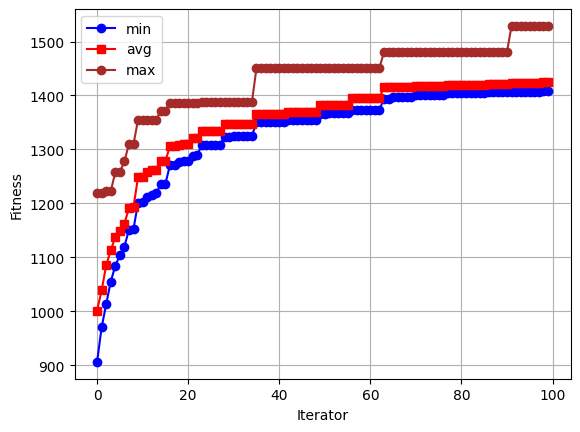

In [468]:
i = 0
minList = []
maxList = []
avg = 0
avgList = []
itList = range(iteration)

populationList=initialise()
fitnessList=evaluate(populationList)

while(i < iteration):
  avg = 0
  parentSelectedList = parentSelect(fitnessList)
  childList = recombine(parentSelectedList)
  mutationList = mutation(childList)
  survivorList = survivorSelect(mutationList,fitnessList)

  for j in range(len(survivorList)):
    avg += int(survivorList[j][1])

  avgList.append(avg/len(survivorList))
  minList.append(min(survivorList,key=lambda srt: srt[1])[1])
  maxList.append(max(survivorList,key=lambda srt: srt[1])[1])
  fitnessList = survivorList
  i += 1
#  print(survivorList)

print(survivorList)

### display graphic for min, max and average values ###
plt.plot(itList,minList,'o-',c='blue')
plt.plot(itList,avgList,'s-',c='red')
plt.plot(itList,maxList,'o-',c='brown')
plt.grid(True)
plt.xlabel('Iterator')
plt.ylabel('Fitness')
plt.legend(["min","avg","max"])
plt.show()